In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv
/kaggle/input/location/location.csv


In [50]:
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

****Reading the 'Zomato Bangalore Restaurants' dataset****

In [51]:
zomato_real=pd.read_csv("../input/zomato-bangalore-restaurants/zomato.csv")
zomato_real.head() # prints the first 5 rows of the dataset

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


**Reading the 'Locations' dataset**

In [52]:
df = pd.read_csv('../input/location/location.csv')
df.head(10)

,Location,Latitude,Longitude
0,Bannerghatta Road,12.807066,77.578735
1,Banashankari,12.925453,77.546761
2,Basavanagudi,12.942117,77.575361
3,Bellandur,12.937562,77.670097
4,Brigade Road,12.970703,77.606808
5,Brookefield,12.973864,77.713768
6,BTM,12.916576,77.610116
7,Church Street,12.975001,77.604675
8,Electronic City,12.840711,77.676369
9,Frazer Town,13.071300,77.5905


In [53]:
X=df.loc[:,['Location','Latitude','Longitude']]
X

,Location,Latitude,Longitude
0,Bannerghatta Road,12.807066,77.578735
1,Banashankari,12.925453,77.546761
2,Basavanagudi,12.942117,77.575361
3,Bellandur,12.937562,77.670097
4,Brigade Road,12.970703,77.606808
5,Brookefield,12.973864,77.713768
6,BTM,12.916576,77.610116
7,Church Street,12.975001,77.604675
8,Electronic City,12.840711,77.676369
9,Frazer Town,13.071300,77.5905


**Plotting the points (locations in Bangalore)**

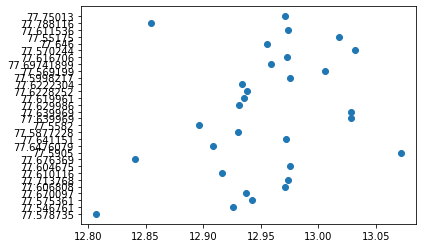

In [54]:
plt.scatter(X.Latitude,X.Longitude)

In [55]:
X

,Location,Latitude,Longitude
0,Bannerghatta Road,12.807066,77.578735
1,Banashankari,12.925453,77.546761
2,Basavanagudi,12.942117,77.575361
3,Bellandur,12.937562,77.670097
4,Brigade Road,12.970703,77.606808
5,Brookefield,12.973864,77.713768
6,BTM,12.916576,77.610116
7,Church Street,12.975001,77.604675
8,Electronic City,12.840711,77.676369
9,Frazer Town,13.071300,77.5905


**Applying various clustering methods to find optimal method**

**1. K means clustering**

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
km=KMeans(n_clusters=8)
y_predicted=km.fit_predict(X[['Longitude','Latitude']])
y_predicted

array([1, 2, 2, 5, 0, 4, 5, 0, 1, 3, 5, 0, 2, 2, 7, 7, 5, 5, 5, 5, 0, 3,
       4, 0, 3, 5, 3, 0, 6, 4], dtype=int32)

In [57]:
X['cluster']=y_predicted
X

,Location,Latitude,Longitude,cluster
0,Bannerghatta Road,12.807066,77.578735,1
1,Banashankari,12.925453,77.546761,2
2,Basavanagudi,12.942117,77.575361,2
3,Bellandur,12.937562,77.670097,5
4,Brigade Road,12.970703,77.606808,0
5,Brookefield,12.973864,77.713768,4
6,BTM,12.916576,77.610116,5
7,Church Street,12.975001,77.604675,0
8,Electronic City,12.840711,77.676369,1
9,Frazer Town,13.071300,77.5905,3


The various locations and the clusters they belong to can be seen.

In [58]:
X[X.cluster==3]

,Location,Latitude,Longitude,cluster
9,Frazer Town,13.071300,77.5905,3
21,Malleshwaram,13.005459,77.569199,3
24,New BEL Road,13.031359,77.570244,3
26,Rajajinagar,13.017800,77.55175,3


As can be seen, 'Bannerghatta Road' belongs to cluster 3.

In [59]:
Y= X[['Latitude','Longitude']]

**Applying silhouette score as the performance parameter**

Silhoutte score tests the distance between clusters and checks how well defined and spaced out the clusters are. It returns a value between -1 and 1. Higher the value, the more well defined the cluster is and more optimal is the algorithm.

In [60]:
score = silhouette_score(Y, km.labels_, metric='euclidean')

In [61]:
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.463


The silhouette score for K Means is 0.4

**2. Agglomerative Clustering**

In [62]:
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [63]:
Y=df.loc[:,['Latitude','Longitude']]
Y

,Latitude,Longitude
0,12.807066,77.578735
1,12.925453,77.546761
2,12.942117,77.575361
3,12.937562,77.670097
4,12.970703,77.606808
5,12.973864,77.713768
6,12.916576,77.610116
7,12.975001,77.604675
8,12.840711,77.676369
9,13.071300,77.5905


Plotting the dendogram:

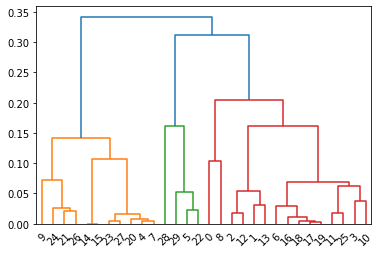

In [64]:
dendrogram = sch.dendrogram(sch.linkage(Y, method='ward'))

Taking the number of clusters as 6 and applying the algorithm:

In [65]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
model.fit(Y)
Y=np.array(Y)
labels = model.labels_
labels

array([1, 4, 4, 2, 0, 3, 2, 0, 1, 0, 2, 2, 4, 4, 0, 0, 2, 2, 2, 2, 0, 0,
       3, 0, 0, 2, 0, 0, 5, 3])

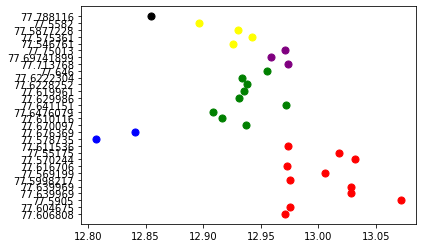

In [66]:
#labels = hierarchical_cluster.fit_predict(data)
plt.scatter(Y[labels==0, 0], Y[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(Y[labels==1, 0], Y[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(Y[labels==2, 0], Y[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(Y[labels==3, 0], Y[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(Y[labels==4, 0], Y[labels==4, 1], s=50, marker='o', color='yellow')
plt.scatter(Y[labels==5, 0], Y[labels==5, 1], s=50, marker='o', color='black')
#plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

From the plot, we can see the 6 different clusters and how the points in the plot are grouped as the clusters.

In [67]:
score = silhouette_score(Y, model.labels_, metric='euclidean')

In [68]:
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.355


The silhouette score for Agglomerative Clustering is 0.355

**3. Mean Shift Clustering**

In [69]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score

In [70]:
bandwidth = estimate_bandwidth(Y, quantile=0.2, n_samples=30)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(Y)
Y=np.array(Y)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
labels

number of estimated clusters : 6


array([5, 0, 0, 2, 0, 2, 0, 0, 4, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       2, 0, 1, 0, 1, 0, 3, 2])

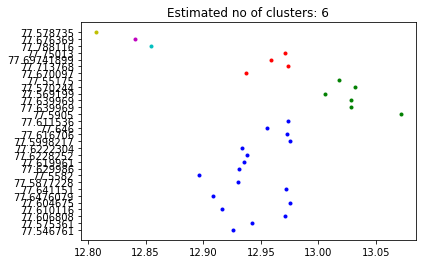

In [71]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(Y[my_members, 0], Y[my_members, 1], col + ".")
    
plt.title("Estimated no of clusters: %d" % n_clusters_)
plt.show()

The 6 different cluster are plotted as can be seen.

In [72]:
score = silhouette_score(Y, ms.labels_, metric='euclidean')

In [73]:
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.380


The silhoutte score of Mean Shift clustering is 0.380

Comparing sihouette scores of different clustering methods, we can see that the silhouette score for K Means algorithm is the highest (0.4). As a result, we will proceed with K Means algorithm as our choice to form optimal clusters to do location based filtering. 